In [1]:
library(tidyverse)
theme_set(theme_classic())
options(repr.plot.width=10, repr.plot.height=5)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# STATS 504
## Week 5: NHANES data

## The data

- [**NHANES**](https://www.cdc.gov/nchs/nhanes/index.htm) stands for the National Health and Nutrition Examination Survey.
- Series of studies designed to assess the health and nutritional status of adults and children in the United States.
- Conducted by the National Center for Health Statistics (NCHS), part of the Centers for Disease Control and Prevention (CDC).

## Purpose of NHANES

- To determine the prevalence of major diseases and risk factors for diseases.
- To assess nutritional status and its association with health promotion and disease prevention.
- To guide public health policy and priorities.



## How NHANES Works

- NHANES combines interviews and physical examinations.
- The interview includes demographic, socioeconomic, dietary, and health-related questions.
- The examination part includes medical, dental, and physiological measurements, as well as laboratory tests administered by medical personnel.
- NHANES data is collected in 2-year cycles and released in public-use data files.

## Questions we will study today
1. Is height associated with income? (Does height *cause* you to have higher income?)
2. Is smoking associated with high blood pressure (hypertension)?
3. How does TV watching affect body weight?

For today's lecture we will use the following "pre-packaged" NHANES extracted dataset:

In [3]:
# install.packages('NHANES')
library(NHANES)
data(NHANES)

help(NHANES)

(Next lecture, we will see how to import the raw data directly off their website.)

In [4]:
?NHANES

## Height vs. income
It is often claimed that taller people earn more money. Do we see this in the data?

In [6]:
NHANES %>% print

# A tibble: 10,000 × 76
      ID SurveyYr Gender   Age AgeDecade AgeMonths Race1 Race3 Education   
   <int> <fct>    <fct>  <int> <fct>         <int> <fct> <fct> <fct>       
 1 51624 2009_10  male      34 " 30-39"        409 White NA    High School 
 2 51624 2009_10  male      34 " 30-39"        409 White NA    High School 
 3 51624 2009_10  male      34 " 30-39"        409 White NA    High School 
 4 51625 2009_10  male       4 " 0-9"           49 Other NA    NA          
 5 51630 2009_10  female    49 " 40-49"        596 White NA    Some College
 6 51638 2009_10  male       9 " 0-9"          115 White NA    NA          
 7 51646 2009_10  male       8 " 0-9"          101 White NA    NA          
 8 51647 2009_10  female    45 " 40-49"        541 White NA    College Grad
 9 51647 2009_10  female    45 " 40-49"        541 White NA    College Grad
10 51647 2009_10  female    45 " 40-49"        541 White NA    College Grad
# ℹ 9,990 more rows
# ℹ 67 more variables: MaritalStatus <fct>, 

Warning message:
“Removed 353 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


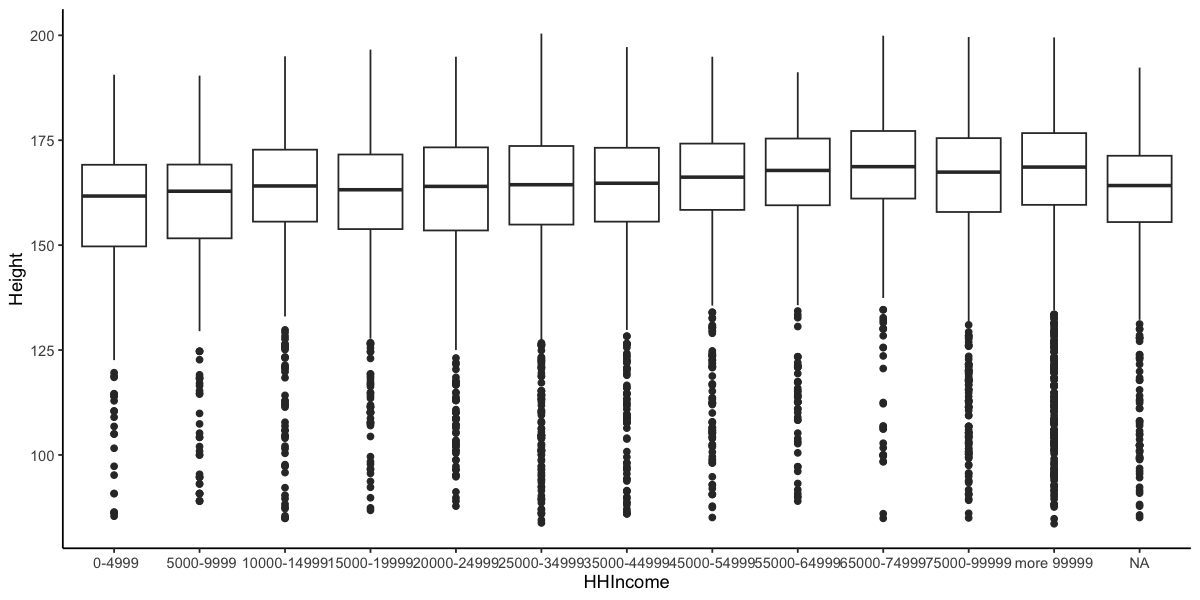

In [7]:
# plot the joint distribution of HHIncome and Height

ggplot(NHANES) + geom_boxplot(aes(x = HHIncome, y = Height))

## Quiz 🤷  

Comparing the mean height of the highest income level vs. everyone else, we find that:

<ol style="list-style-type: upper-alpha;">
    <li> Mean height among the richest individuals is significantly <emph>higher</emph> compared to the rest.
    <li> Mean height among the richest individuals is significantly <emph>lower</emph> compared to the rest..
    <li> Mean height among the richest individuals is <b>in</b>significantly <emph>higher</emph> compared to the rest.
    <li> Mean height among the richest individuals is <b>in</b>significantly <emph>lower</emph> compared to the rest.</ol>

"Significant" means statistically significant at the $\alpha=0.05$ level.

In [7]:
# regression of HHIncome on Height

lm(Height ~ I(HHIncome == "more 99999"), data = NHANES) %>% summary


Call:
lm(formula = Height ~ I(HHIncome == "more 99999"), data = NHANES)

Residuals:
    Min      1Q  Median      3Q     Max 
-81.060  -4.893   4.340  12.640  39.307 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     161.0931     0.2481 649.327  < 2e-16 ***
I(HHIncome == "more 99999")TRUE   3.5668     0.5021   7.104  1.3e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.3 on 8860 degrees of freedom
  (1138 observations deleted due to missingness)
Multiple R-squared:  0.005664,	Adjusted R-squared:  0.005552 
F-statistic: 50.47 on 1 and 8860 DF,  p-value: 1.302e-12


Let's try stratifying income into quartiles:

In [13]:
# Create income quartile and summarize height by quartile
nhanes_summary <- NHANES %>%
filter(!is.na(Height), !is.na(HHIncomeMid))%>%
  mutate(inctile = ntile(HHIncomeMid, 4)) %>%
  select(HHIncome, HHIncomeMid, Height, inctile) %>%
  group_by(inctile) %>%
  summarise(mean_height = mean(Height, na.rm = TRUE),
            n = n(),
            .groups = "drop")

print(nhanes_summary)

# A tibble: 4 × 3
  inctile mean_height     n
    <int>       <dbl> <int>
1       1        159.  2216
2       2        161.  2216
3       3        164.  2215
4       4        165.  2215


In [11]:
# Clean and prepare the data
nhanes_clean <- NHANES %>%
  filter(!is.na(Height), !is.na(HHIncomeMid)) %>%
  mutate(inctile = ntile(HHIncomeMid, 4))  # Income quartiles

# Run ANOVA: Height ~ Income Quartile
aov_result <- aov(Height ~ factor(inctile), data = nhanes_clean)

# Show summary
summary(aov_result)

                  Df  Sum Sq Mean Sq F value Pr(>F)    
factor(inctile)    3   51636   17212    42.1 <2e-16 ***
Residuals       8858 3621806     409                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## Digression: association vs. causation
- The preceding analyses reveal that there is strong *association* between income and height.
- Does that mean that being taller *causes you* to have higher income? (Why or why not?)
- (We will return to these points in a future lecture.)

## Is blood pressure elevated in smokers?

- Smoking tobacco increases heart rate and blood pressure. Long-term smoking can lead to the development of hypertension and other cardiovascular diseases.
- Nicotine from cigarettes stimulates the body to produce adrenaline, which accelerates the heart rate and raises blood pressure. Other chemicals in tobacco can damage the arterial walls, contributing to heart conditions.
- Some studies have shown a correlation between smoking and increased risk of developing hypertension. This relationship is dose-dependent, with heavier smoking leading to greater risks.
- Do we see such a relationship in the NHANES data?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 103 rows containing non-finite outside the scale range (`stat_bin()`).”


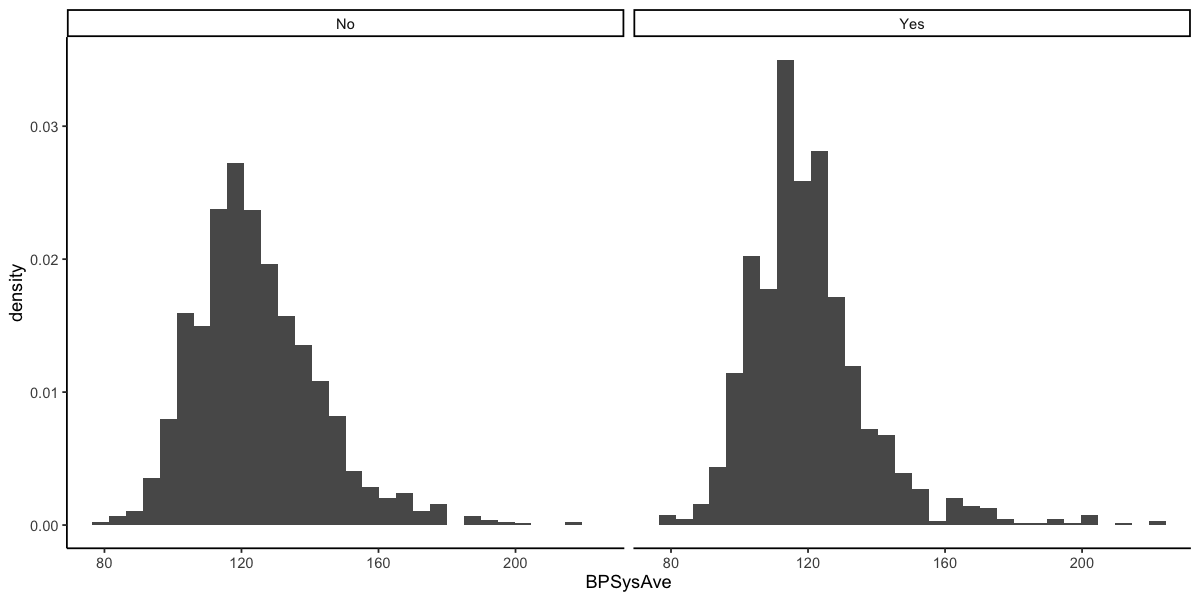

In [14]:
# Systolic bp vs SmokeNow

NHANES  %>%  filter(!is.na(SmokeNow)) %>% ggplot() +
    geom_histogram(aes(x = BPSysAve, after_stat(density))) +
    facet_grid(~ SmokeNow)

It's visually hard for me to distinguish these two distributions. 

## Quiz 🤷  

Comparing the mean systolic blood pressure of the smokers (people who answered yes to `SmokeNow`) vs. non-smokers, we find that:

<ol style="list-style-type: upper-alpha;">
    <li> Mean systolic bp among smokers is significantly <emph>higher</emph> than among nonsmokers.
    <li> Mean systolic bp among smokers is significantly <emph>lower</emph> than among nonsmokers.
    <li> Mean systolic bp among smokers is <b>in</b>significantly <emph>higher</emph> than among nonsmokers.
    <li> Mean systolic bp among smokers is <b>in</b>significantly <emph>lower</emph> than among nonsmokers.
</ol>

"Significant" means statistically significant at the $\alpha=0.05$ level.

In [15]:
# difference in group means

lm( BPSysAve ~ SmokeNow, data = NHANESraw) %>% summary




Call:
lm(formula = BPSysAve ~ SmokeNow, data = NHANESraw)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.143 -12.587  -2.865   9.413 102.413 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 126.1426     0.3639 346.619   <2e-16 ***
SmokeNowYes  -4.5560     0.5336  -8.538   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.54 on 4850 degrees of freedom
  (15441 observations deleted due to missingness)
Multiple R-squared:  0.01481,	Adjusted R-squared:  0.01461 
F-statistic:  72.9 on 1 and 4850 DF,  p-value: < 2.2e-16


- We get the (possibly) counter-intuitive result that blood pressure is lower in smokers. 
- What are possible explanations for this?

There may be potential confounders! 


## 1. Age Confounding

- Smokers may be younger than nonsmokers in population datasets like NHANES. (need to verify)
- Blood pressure increases with age so younger age lowers the average SBP in smokers.

## 2. BMI and Body Composition

- Smokers may have lower body weight or BMI than nonsmokers.
- Lower BMI is associated with lower blood pressure.
  

In [16]:
NHANES %>%
    lm(BPSysAve ~ SmokeNow + AgeMonths + Gender + BMI + AlcoholYear, data = .) %>% 
    summary


Call:
lm(formula = BPSysAve ~ SmokeNow + AgeMonths + Gender + BMI + 
    AlcoholYear, data = .)

Residuals:
    Min      1Q  Median      3Q     Max 
-53.610  -9.253  -1.926   7.837  79.608 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 93.755921   2.629492  35.656  < 2e-16 ***
SmokeNowYes  1.143666   0.939801   1.217   0.2238    
AgeMonths    0.032592   0.002520  12.934  < 2e-16 ***
Gendermale   5.160460   0.879322   5.869 5.53e-09 ***
BMI          0.153822   0.066941   2.298   0.0217 *  
AlcoholYear  0.007889   0.004012   1.967   0.0494 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.93 on 1338 degrees of freedom
  (8656 observations deleted due to missingness)
Multiple R-squared:  0.1493,	Adjusted R-squared:  0.1461 
F-statistic: 46.96 on 5 and 1338 DF,  p-value: < 2.2e-16


Let's try looking at this through a different lens. The American Heart Association defines hypertension as systolic blood pressure > 130 mm Hg or diastolic bp > 80 mm Hg. Let's try logistic regression on hypertensive status.

In [18]:
NHANES %>% mutate(hypt = (BPSysAve > 130) | (BPDiaAve > 80)) %>% drop_na(hypt) -> hypt_df
   xtabs(~ hypt + SmokeNow, data = hypt_df) %>% prop.table
   lm(hypt ~ SmokeNow, data = hypt_df) %>% summary
    summarize(hypt_df, mean(hypt), n())

       SmokeNow
hypt           No       Yes
  FALSE 0.3259331 0.3252896
  TRUE  0.2223295 0.1264479


Call:
lm(formula = hypt ~ SmokeNow, data = hypt_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4055 -0.4055 -0.2799  0.5945  0.7201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.40552    0.01145  35.419  < 2e-16 ***
SmokeNowYes -0.12560    0.01703  -7.373 2.12e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4726 on 3106 degrees of freedom
  (5443 observations deleted due to missingness)
Multiple R-squared:  0.0172,	Adjusted R-squared:  0.01689 
F-statistic: 54.37 on 1 and 3106 DF,  p-value: 2.124e-13


mean(hypt),n()
<dbl>,<int>
0.2668694,8551


In [20]:
library(modelr)

mdl <- glm(hypt ~ SmokeNow + AgeMonths + Gender, data = hypt_df, family = "binomial")

summary(mdl)

 hypt_df %>% add_predictions(mdl, type="response") %>% head %>% select(SmokeNow, pred)


Call:
glm(formula = hypt ~ SmokeNow + AgeMonths + Gender, family = "binomial", 
    data = hypt_df)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.1123151  0.2505656 -12.421  < 2e-16 ***
SmokeNowYes -0.0188052  0.1239390  -0.152 0.879400    
AgeMonths    0.0036043  0.0003369  10.700  < 2e-16 ***
Gendermale   0.4218151  0.1180742   3.572 0.000354 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1904.3  on 1526  degrees of freedom
Residual deviance: 1751.3  on 1523  degrees of freedom
  (7024 observations deleted due to missingness)
AIC: 1759.3

Number of Fisher Scoring iterations: 4


SmokeNow,pred
<fct>,<dbl>
No,0.2285776
No,0.2285776
No,0.2285776
Yes,0.2722999
NA,NA
NA,NA


In fact there are four stages of hypertension:
- **Normal Blood Pressure**
  - Systolic: Less than 120 mm Hg
  - Diastolic: Less than 80 mm Hg
- **Elevated Blood Pressure**
  - Systolic: 120-129 mm Hg
  - Diastolic: Less than 80 mm Hg
- **Hypertension Stage 1**
  - Systolic: 130-139 mm Hg
  - Diastolic: 80-89 mm Hg
- **Hypertension Stage 2**
  - Systolic: At least 140 mm Hg
  - Diastolic: At least 90 mm Hg
- **Hypertensive Crisis (Emergency situation)**
  - Systolic: Over 180 mm Hg and/or
  - Diastolic: Over 120 mm Hg

In [21]:
bp_df <- NHANES %>%
  mutate(BPStage = case_when(
    BPSysAve < 120 & BPDiaAve < 80 ~ "Normal",
    BPSysAve >= 120 & BPSysAve < 130 & BPDiaAve < 80 ~ "Elevated",
    BPSysAve >= 130 & BPSysAve < 140 | BPDiaAve >= 80 & BPDiaAve < 90 ~ "Hypertension Stage 1",
    BPSysAve >= 140 | BPDiaAve >= 90 ~ "Hypertension Stage 2",
    BPSysAve > 180 | BPDiaAve > 120 ~ "Hypertensive Crisis",
    TRUE ~ NA_character_ # for cases that don't fit any criteria or missing data
  )) 

# View the distribution of blood pressure stages
table(bp_df$BPStage)


            Elevated Hypertension Stage 1 Hypertension Stage 2 
                1248                 1720                  789 
              Normal 
                4794 

## Effects at the tails
Let's consider whether there is a measurable effect for stage 2 hypertension:

In [22]:
lm(BPStage == "Hypertension Stage 2" ~ SmokeNow + Gender + Age, data=bp_df) %>% summary


Call:
lm(formula = BPStage == "Hypertension Stage 2" ~ SmokeNow + Gender + 
    Age, data = bp_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.32962 -0.17495 -0.09017 -0.00094  1.03476 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.1899786  0.0219012  -8.674  < 2e-16 ***
SmokeNowYes  0.0064938  0.0121049   0.536  0.59168    
Gendermale   0.0371872  0.0114340   3.252  0.00116 ** 
Age          0.0059490  0.0003585  16.594  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3159 on 3104 degrees of freedom
  (6892 observations deleted due to missingness)
Multiple R-squared:  0.0918,	Adjusted R-squared:  0.09093 
F-statistic: 104.6 on 3 and 3104 DF,  p-value: < 2.2e-16


## Ordinal logistic regression

Ordinal Logistic Regression, also known as Ordered Logit Regression, is a statistical technique used for modeling the relationship between an ordinal dependent variable and one or more independent variables.

- Ordinal dependent variable: A categorical variable with a clear ordering of the categories, but not necessarily a constant difference between categories.
- Independent variables: Can be continuous, dichotomous, or categorical, and are used to predict the ordinal outcome.


### OLR model
$$
\log\left(\frac{P(Y \leq j)}{P(Y > j)}\right) = \alpha_j - \beta X, \quad j = 1, 2, \ldots, J-1
$$

where:

- $Y$ is the ordinal dependent variable with $J$ ordered categories.
- $P(Y \leq j)$ is the cumulative probability of $Y$ being in category $j$ or lower.
- $X$ represents the vector of independent variables (predictors).
- $\beta$ is the vector of coefficients associated with the predictors.
- $\alpha_j$ are the threshold parameters (cutpoints) for each $j$th category, with $j = 1, 2, \ldots, J-1$.

### Proportional odds assumption
The model implies the following key assumption:
$$
\frac{\partial}{\partial X}\log\left(\frac{P(Y \leq j)}{P(Y > j)}\right) = -\beta, \quad \text{for all } j
$$

This says that the odds ratios comparing any two outcome categories are assumed to be the same across all levels of the predictors.

In [23]:
bp_df$BPStage <- factor(
    bp_df$BPStage, ordered = TRUE, 
     levels = c("Normal", "Elevated", "Hypertension Stage 1", 
                "Hypertension Stage 2", "Hypertensive Crisis")
    )

In [24]:
library(MASS)
mdl <- polr(BPStage ~ Age + Gender + SmokeNow, data = bp_df, Hess=TRUE)
summary(mdl)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




Call:
polr(formula = BPStage ~ Age + Gender + SmokeNow, data = bp_df, 
    Hess = TRUE)

Coefficients:
               Value Std. Error t value
Age          0.04387   0.002293 19.1302
Gendermale   0.56211   0.070051  8.0243
SmokeNowYes -0.03782   0.073323 -0.5157

Intercepts:
                                          Value   Std. Error t value
Normal|Elevated                            2.2568  0.1408    16.0271
Elevated|Hypertension Stage 1              3.0016  0.1448    20.7237
Hypertension Stage 1|Hypertension Stage 2  4.5871  0.1578    29.0753
Hypertension Stage 2|Hypertensive Crisis  16.1372 15.1684     1.0639

Residual Deviance: 7332.728 
AIC: 7346.728 
(6892 observations deleted due to missingness)

### Interpretation

Important to distinguish between the coefficients and the odds ratios:

- **Coefficients**: Represent the log odds of being in a higher category of the outcome variable for a one-unit increase in the predictor.
- **Odds Ratios**: Exponentiated coefficients, indicating how the odds of being in a higher category change with a one-unit increase in the predictor.

Hence:

- **Positive Coefficient (Odds Ratio > 1)**: Indicates an increase in the predictor is associated with higher odds of being in a higher category.
- **Negative Coefficient (Odds Ratio < 1)**: Suggests an increase in the predictor is associated with lower odds of being in a higher category.

In [25]:
exp(coef(mdl))

Age  Gendermale SmokeNowYes 
  1.0448461   1.7543711   0.9628896

## TV watching and and body mass
How does watching TV associate with body weight among individuals in the NHANES dataset? We'll study this in several ways:

- **Descriptive Analysis**: Understand the distribution of TV and BMI.
- **Correlation Analysis**: Examine the linear relationship between TV and BMI.
- **Linear Regression**: Assess the impact of TV on BMI, controlling for confounders.
- **Logistic Regression**: Evaluate the odds of being overweight or obese with increased TV watching.
- **Mixed Models/GEE**: Account for clustering within the data.
- **Non-Linear Models**: Explore potential non-linear relationships between TV and BMI.

### Descriptive analysis
We start by considering the distribution of BMI. The WHO defines BMI according to the following levels:
- Underweight: BMI less than 18.5+
- Normal weight: BMI 18.5 to 24.9
- Overweight: BMI 25 to 29.9
- Obesity: BMI 30 and above

Warning message:
“Removed 366 rows containing non-finite outside the scale range (`stat_bin()`).”


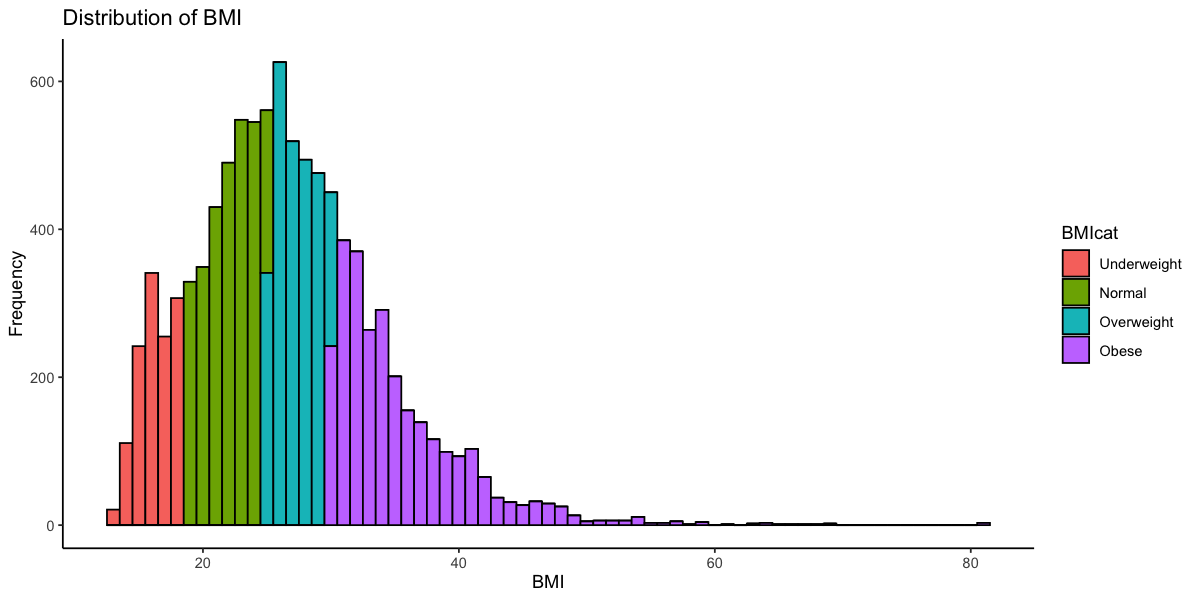

In [26]:
# Histogram of BMI
NHANES %>% mutate(BMIcat = cut(BMI, c(0, 18.5, 24.9, 29.9, Inf), 
                               labels=c("Underweight", "Normal", "Overweight", "Obese"))) %>% 
  ggplot(aes(x = BMI, fill = BMIcat)) +
  geom_histogram(binwidth = 1, color = "black") +
  labs(title = "Distribution of BMI", x = "BMI", y = "Frequency")

Warning message:
“Removed 43 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


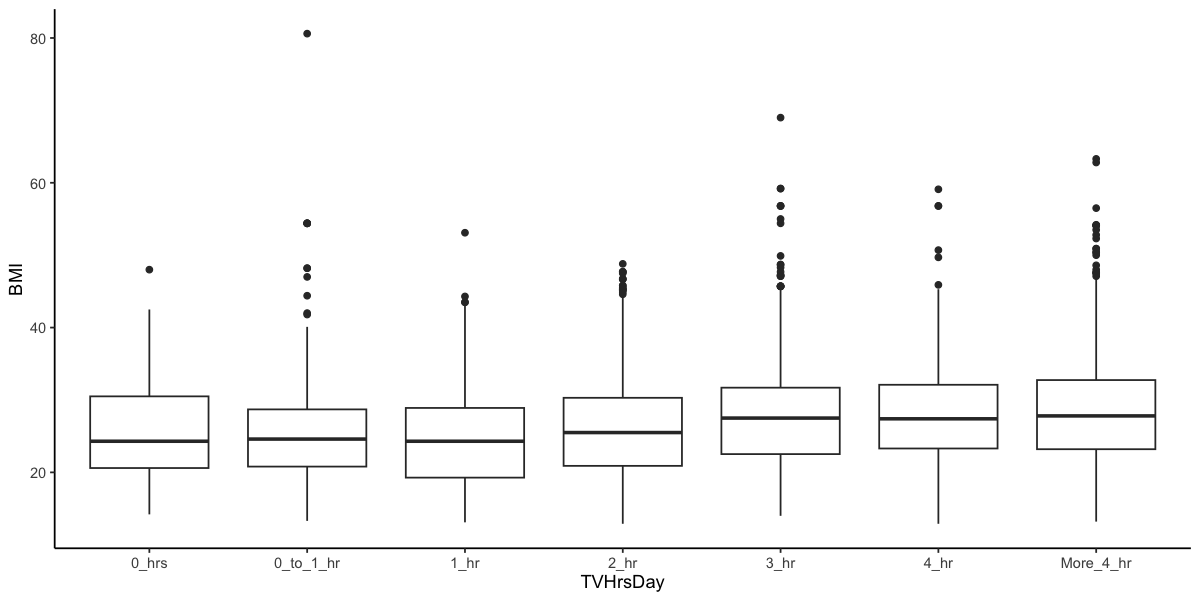

In [27]:
NHANES %>% filter(!is.na(TVHrsDay)) %>% ggplot + geom_boxplot(aes(x = TVHrsDay, y = BMI))

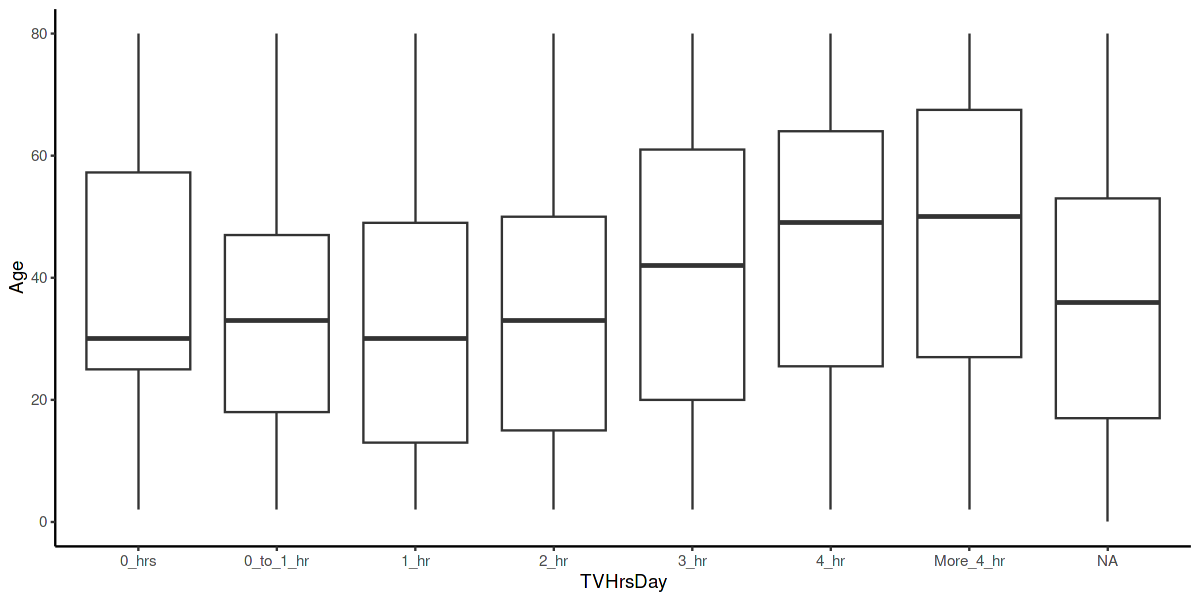

In [59]:
NHANES %>% ggplot(aes(x = TVHrsDay, y = Age)) +
    geom_boxplot()

Warning message:
“Removed 366 rows containing non-finite values (`stat_boxplot()`).”


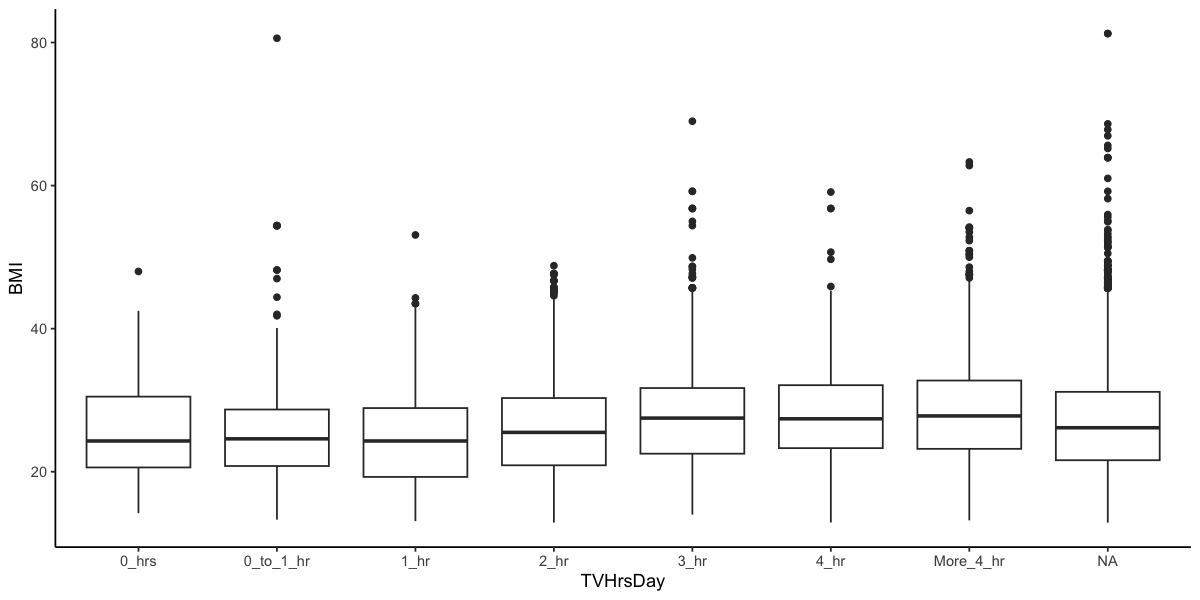

In [39]:
# Boxplot of BMI by TV category
NHANES %>% ggplot(aes(x = TVHrsDay, y = BMI)) + geom_boxplot()

## Regression analysis
Next, let's model the effect of TV watching on BMI. We'll try two different ways:

In [28]:
lm(BMI ~ TVHrsDay + Age + Gender, data = NHANES) %>% summary


Call:
lm(formula = BMI ~ TVHrsDay + Age + Gender, data = NHANES)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.447  -4.682  -1.144   3.402  56.803 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       20.442404   0.678778  30.116  < 2e-16 ***
TVHrsDay0_to_1_hr  0.057722   0.702048   0.082  0.93448    
TVHrsDay1_hr      -0.038404   0.688715  -0.056  0.95553    
TVHrsDay2_hr       1.049416   0.677463   1.549  0.12144    
TVHrsDay3_hr       1.912816   0.690665   2.770  0.00564 ** 
TVHrsDay4_hr       1.571250   0.715124   2.197  0.02806 *  
TVHrsDayMore_4_hr  2.149244   0.705424   3.047  0.00233 ** 
Age                0.131885   0.004429  29.776  < 2e-16 ***
Gendermale         0.004185   0.189049   0.022  0.98234    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.55 on 4807 degrees of freedom
  (5184 observations deleted due to missingness)
Multiple R-squared:  0.1914,	Adjusted R-squared:  0

Next, let's try with the categorized `TVHrsDay` replaced by a continuous estimate:

In [29]:
NHANES <- NHANES %>%
  mutate(TVHrsDayNum = case_when(
    TVHrsDay == "0_hrs" ~ 0,
    TVHrsDay == "0_to_1_hr" ~ 0.5, # Assuming the midpoint of 0 to 1 hour is 0.5 hours
    TVHrsDay == "1_hr" ~ 1,        # Exact value for 1 hour
    TVHrsDay == "2_hr" ~ 2,        # Exact value for 2 hours
    TVHrsDay == "3_hr" ~ 3,        # Exact value for 3 hours
    TVHrsDay == "4_hr" ~ 4,        # Exact value for 4 hours
    TVHrsDay == "More_4_hr" ~ 4.5  # Assuming the midpoint for "More than 4 hours" as 4.5 hours
  )) 
lm(BMI ~ TVHrsDayNum + Age + Gender + PhysActiveDays, data = NHANES) %>% summary


Call:
lm(formula = BMI ~ TVHrsDayNum + Age + Gender + PhysActiveDays, 
    data = NHANES)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.575  -4.590  -1.259   3.461  36.695 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    20.081613   0.442356  45.397  < 2e-16 ***
TVHrsDayNum     0.496073   0.100702   4.926 8.99e-07 ***
Age             0.133191   0.006221  21.409  < 2e-16 ***
Gendermale      0.181333   0.266328   0.681    0.496    
PhysActiveDays -0.018829   0.072515  -0.260    0.795    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.362 on 2284 degrees of freedom
  (7711 observations deleted due to missingness)
Multiple R-squared:  0.1982,	Adjusted R-squared:  0.1968 
F-statistic: 141.2 on 4 and 2284 DF,  p-value: < 2.2e-16


### Effect on obesity
Let's consider the effect on obesity (which is defined above as BMI > 30).

How can we use the logistic regression model to give a "predicted probability of obesity"?

In [30]:
glm(BMI > 30 ~ TVHrsDayNum + Age + PhysActiveDays, 
    data = NHANES, family = "binomial") %>% 
    add_predictions(NHANES, ., type="response") %>% 
    filter(!is.na(pred))

ID,SurveyYr,Gender,Age,AgeDecade,AgeMonths,Race1,Race3,Education,MaritalStatus,⋯,HardDrugs,SexEver,SexAge,SexNumPartnLife,SexNumPartYear,SameSex,SexOrientation,PregnantNow,TVHrsDayNum,pred
<int>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>
62163,2011_12,male,14,10-19,NA,Other,Asian,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,2.0,0.1680069
62172,2011_12,female,43,40-49,NA,Black,Black,High School,NeverMarried,⋯,No,Yes,17,4,2,No,Heterosexual,No,4.5,0.3624364
62174,2011_12,male,80,NA,NA,White,White,College Grad,Married,⋯,NA,NA,NA,NA,NA,NA,NA,NA,4.0,0.5129341
62174,2011_12,male,80,NA,NA,White,White,College Grad,Married,⋯,NA,NA,NA,NA,NA,NA,NA,NA,4.0,0.5205799
62175,2011_12,male,5,0-9,NA,White,White,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,1.0,0.1133533
62176,2011_12,female,34,30-39,NA,White,White,College Grad,Married,⋯,No,Yes,16,15,1,No,Heterosexual,No,2.0,0.2246072
62186,2011_12,female,17,10-19,NA,Black,Black,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,1.0,0.1470677
62190,2011_12,female,15,10-19,NA,Mexican,Mexican,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,2.0,0.1583480
62199,2011_12,male,57,50-59,NA,White,White,College Grad,LivePartner,⋯,Yes,Yes,19,6,0,Yes,Homosexual,NA,1.0,0.2925377


### Non-linear model

Generalized Additive Models (GAMs) extend linear models by allowing non-linear relationships between the independent variables and the dependent variable through the use of smooth functions.
- A GAM can be expressed as $y = \beta_0 + f_1(x_1) + f_2(x_2) + \cdots + f_n(x_n) + \epsilon$, where $y$ is the dependent variable, $\beta_0$ is the intercept, $f_i$ are smooth functions for each predictor $x_i$, and $\epsilon$ is the error term.
- In our example, we'll suppose that 

$$\text{BMI} = s(\text{Age}) + \text{other predictors},$$

where $s()$ denotes a smoothing function applied to age.

In [31]:
library(mgcv)
gam_model <- gam(BMI ~ TVHrsDayNum + s(Age) + Gender + PhysActiveDays, data = NHANES)
summary(gam_model)

Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


This is mgcv 1.9-3. For overview type 'help("mgcv-package")'.




Family: gaussian 
Link function: identity 

Formula:
BMI ~ TVHrsDayNum + s(Age) + Gender + PhysActiveDays

Parametric coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    24.61417    0.36545  67.354  < 2e-16 ***
TVHrsDayNum     0.70171    0.09206   7.622 3.63e-14 ***
Gendermale      0.14947    0.24080   0.621    0.535    
PhysActiveDays -0.01242    0.06551  -0.190    0.850    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
         edf Ref.df     F p-value    
s(Age) 7.948  8.704 124.7  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.346   Deviance explained = 34.9%
GCV = 33.128  Scale est. = 32.955    n = 2289

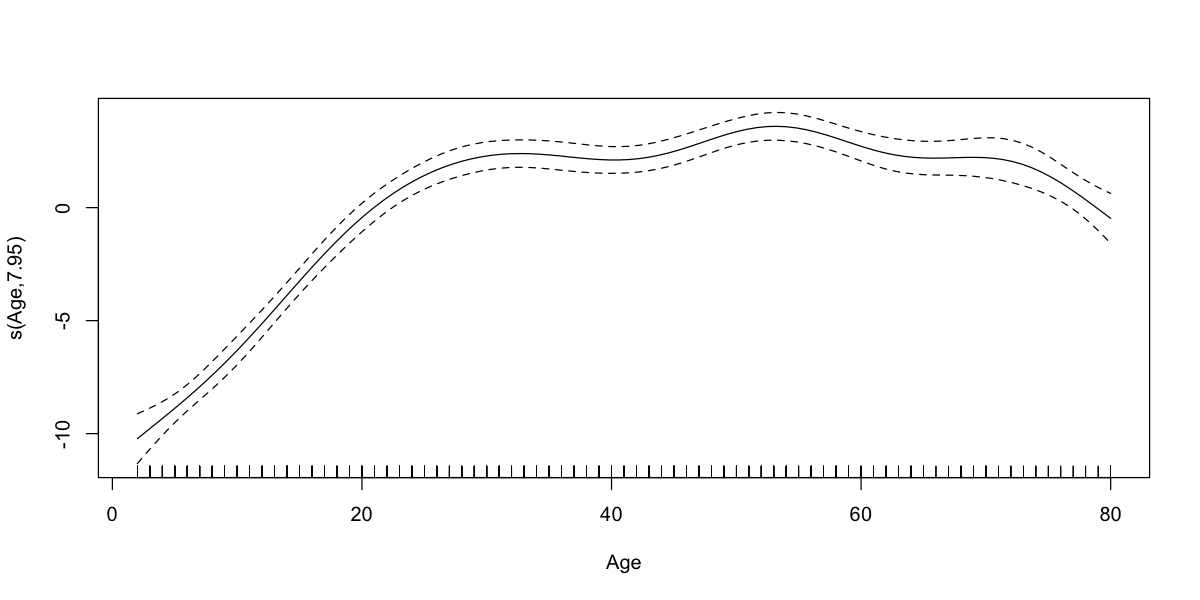

In [32]:
plot(gam_model)
